### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

### Load the Data

In [2]:
data=pd.read_excel ('Data.xlsx')

In [3]:
data.head()

,Customer_Code,Frequency,Variety,Sales
0,50001345,25.000000,107.666667,1.308532e+09
1,50004205,6.000000,25.000000,5.765494e+07
2,50004210,1.666667,12.000000,2.054651e+07
3,50004215,8.666667,31.333333,7.521765e+07
4,50004230,1.666667,7.000000,1.620038e+07


In [4]:
data['Customer_Code'] = data['Customer_Code'].astype(str)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90668 entries, 0 to 90667
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Code  90668 non-null  object 
 1   Frequency      90668 non-null  float64
 2   Variety        90668 non-null  float64
 3   Sales          90668 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.8+ MB


## Visualize the Data

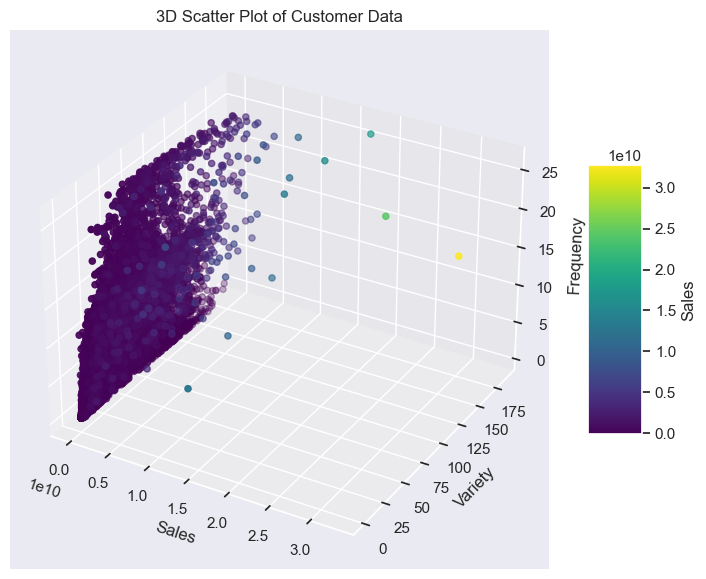

In [6]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(data['Sales'], data['Variety'], data['Frequency'], c=data['Sales'], cmap='viridis', marker='o')

ax.set_xlabel('Sales')
ax.set_ylabel('Variety')
ax.set_zlabel('Frequency')

colorbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
colorbar.set_label('Sales')

ax.set_title('3D Scatter Plot of Customer Data')

ax.grid(True)

plt.show()


## Select The Features

### Clustering

In [7]:
x = data.drop([ 'Customer_Code'], axis = 1)
#x = data.copy()

kmeans = KMeans(4)

kmeans.fit(x)

KMeans(n_clusters=4)

In [9]:
clusters = x.copy()

clusters['cluster_pred']=kmeans.fit_predict(x)

clusters.head()

,Frequency,Variety,Sales,cluster_pred
0,25.000000,107.666667,1.308532e+09,3
1,6.000000,25.000000,5.765494e+07,0
2,1.666667,12.000000,2.054651e+07,0
3,8.666667,31.333333,7.521765e+07,0
4,1.666667,7.000000,1.620038e+07,0


Text(0.5, 0, 'Frequency')

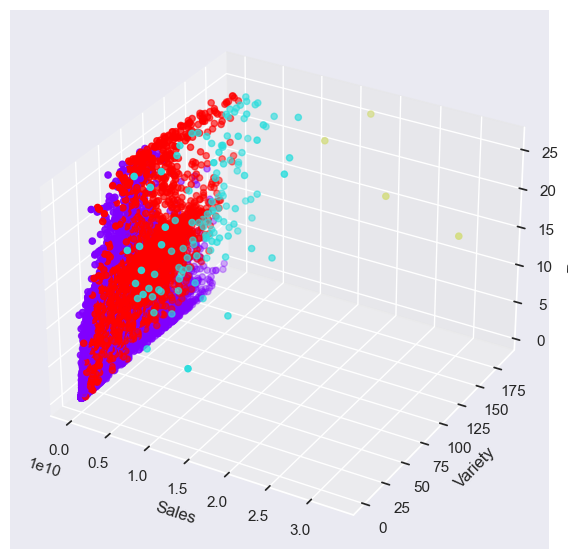

In [10]:
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(clusters['Sales'], clusters['Variety'], clusters['Frequency'],  c=clusters['cluster_pred'], cmap='rainbow')

ax.set_xlabel('Sales')
ax.set_ylabel('Variety')
ax.set_zlabel('Frequency')

## Standardize The Variables

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#x_scaled = preprocessing.scale(x)

x_scaled = pd.DataFrame(x_scaled, columns=['Frequency', 'Variety', 'Sales'])
x_scaled.head()

,Frequency,Variety,Sales
0,4.840984,4.018771,4.095387
1,-0.123987,-0.134170,-0.220043
2,-1.256349,-0.787253,-0.348064
3,0.572851,0.183999,-0.159453
4,-1.256349,-1.038439,-0.363058


## Applying the `Elbow Method`

In [12]:
wcss =[]

for i in range(1,10):
 
    kmeans = KMeans(i)
   
    kmeans.fit(x_scaled)

    wcss.append(kmeans.inertia_)

wcss= pd.DataFrame(wcss, columns = ['WCSS'])
wcss

,WCSS
0,272004.000000
1,169703.930281
2,132947.364289
3,98745.218288
4,83400.383637
5,67579.875449
6,60640.585268
7,54093.715332
8,47645.267525


Text(0, 0.5, 'WCSS')

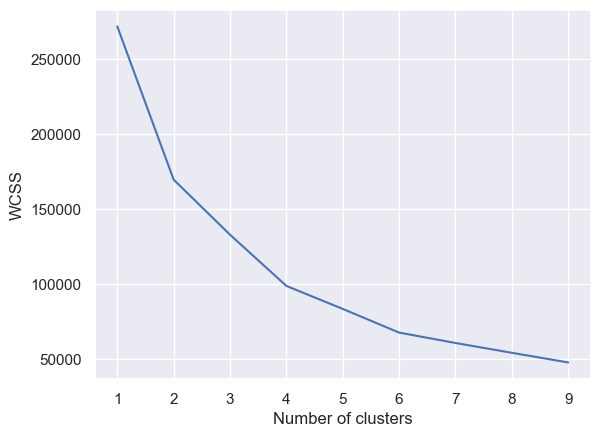

In [13]:
plt.plot(range(1,10),wcss)

plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### Selecting the Number of Clusters (K)

In [14]:
kmeans_new = KMeans(5)

kmeans_new.fit(x_scaled)

clusters_new = data.copy()

clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [26]:
clusters_new

,Customer_Code,Frequency,Variety,Sales,cluster_pred
0,10000269,25.000000,107.666667,1.539449e+09,1
1,10000841,6.000000,25.000000,6.782935e+07,4
2,10000842,1.666667,12.000000,2.417236e+07,0
3,10000843,8.666667,31.333333,8.849135e+07,4
4,10000846,1.666667,7.000000,1.905927e+07,0
...,...,...,...,...,...
90663,90002062,1.666667,6.666667,4.004427e+08,0
90664,90002122,0.666667,4.000000,2.055314e+07,0
90665,90002348,6.666667,26.000000,9.111966e+07,4
90666,90002706,2.666667,41.000000,1.346962e+08,4


Text(0.5, 0, 'Frequency')

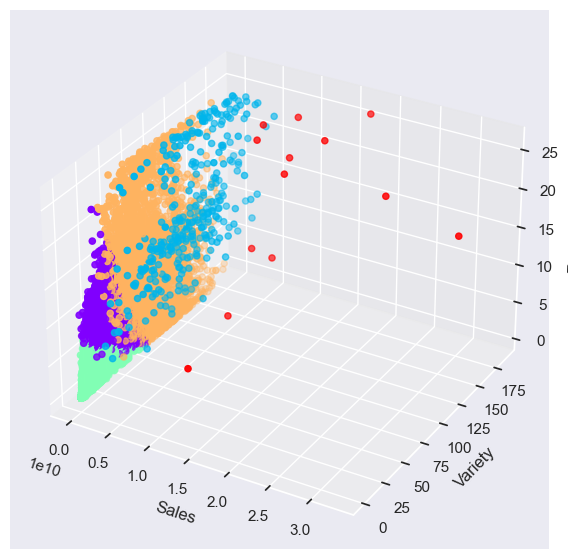

In [15]:
fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(clusters_new['Sales'], clusters_new['Variety'], clusters_new['Frequency'],  c=clusters_new['cluster_pred'], cmap='rainbow')

ax.set_xlabel('Sales')
ax.set_ylabel('Variety')
ax.set_zlabel('Frequency')

In [16]:
clusters_new.to_excel('Clustering_New.xlsx', index=False)


In [17]:
clusters_new

,Customer_Code,Frequency,Variety,Sales,cluster_pred
0,50001345,25.000000,107.666667,1.308532e+09,1
1,50004205,6.000000,25.000000,5.765494e+07,0
2,50004210,1.666667,12.000000,2.054651e+07,2
3,50004215,8.666667,31.333333,7.521765e+07,0
4,50004230,1.666667,7.000000,1.620038e+07,2
...,...,...,...,...,...
90663,450010310,1.666667,6.666667,3.403763e+08,2
90664,450010610,0.666667,4.000000,1.747017e+07,2
90665,450011740,6.666667,26.000000,7.745171e+07,0
90666,450013530,2.666667,41.000000,1.144918e+08,2


In [21]:
cluster_mapping = {
    3: 'VIP',
    1: 'A',
    2: 'B',
    4: 'C',
    0: 'D'
}

clusters_new['Cluster_Label'] = clusters_new['cluster_pred'].map(cluster_mapping)


In [22]:
clusters_new

,Customer_Code,Frequency,Variety,Sales,cluster_pred,Cluster_Label
0,50001345,25.000000,107.666667,1.308532e+09,1,A
1,50004205,6.000000,25.000000,5.765494e+07,0,D
2,50004210,1.666667,12.000000,2.054651e+07,2,B
3,50004215,8.666667,31.333333,7.521765e+07,0,D
4,50004230,1.666667,7.000000,1.620038e+07,2,B
...,...,...,...,...,...,...
90663,450010310,1.666667,6.666667,3.403763e+08,2,B
90664,450010610,0.666667,4.000000,1.747017e+07,2,B
90665,450011740,6.666667,26.000000,7.745171e+07,0,D
90666,450013530,2.666667,41.000000,1.144918e+08,2,B


In [23]:
clusters_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90668 entries, 0 to 90667
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Code  90668 non-null  object 
 1   Frequency      90668 non-null  float64
 2   Variety        90668 non-null  float64
 3   Sales          90668 non-null  float64
 4   cluster_pred   90668 non-null  int32  
 5   Cluster_Label  90668 non-null  object 
dtypes: float64(3), int32(1), object(2)
memory usage: 3.8+ MB


In [24]:
group = clusters_new.groupby('Cluster_Label')[['Frequency', 'Variety', 'Sales']].mean()


In [25]:
group['Sales_M'] =group['Sales']/1000000
group['Sales_M'] = group['Sales_M'].astype(int)
group['Frequency'] = group['Frequency'].astype(int)
group['Variety'] = group['Variety'].astype(int)


group

,Frequency,Variety,Sales,Sales_M
Cluster_Label,,,,
A,16,105,2.635981e+09,2635
B,3,14,4.109108e+07,41
C,19,125,1.449287e+10,14492
D,8,30,1.187616e+08,118
VIP,11,65,3.398961e+08,339
